训练误差与泛化误差

  1）机器学习模型在训练数据集上表现出的误差叫做训练误差；
  
  2）在任意一个测试数据样本上表现出的误差的期望值叫做泛化误差。

  统计学习理论的一个假设是：训练数据集和测试数据集里的每一个数据样本都是从同一个概率分布中相互独立地生成出的（独立同分布假设）。
  
  通常情况下，由训练数据学到的模型参数会使模型在训练数据上的表现不差于在测试数据上的表现。
  
  过拟合的情况下，可以达到很小的训练误差，较大的泛化误差。

  结论：训练误差的降低不一定意味着泛化误差的降低。机器学习既需要降低训练误差，又需要降低泛化误差。
--------------------- 
作者：whitenightwu 
来源：CSDN 
原文：https://blog.csdn.net/wydbyxr/article/details/81331895 
版权声明：本文为博主原创文章，转载请附上博文链接！

See:
    http://tec.5lulu.com/statistics/detail/3ann8he4n18me3.html

See Plot: https://zhuanlan.zhihu.com/p/25720278

# 如何 检测 并 避免过拟合？。。。训练集，测试集！

### 训练集 测试集

训练集（training set）：学习样本数据集，通过匹配一些参数来建立 model 。主要是用来训练模型的。

测试集 (test set)：主要是测试训练好的模型的泛化能力。

显然，

    training set是用来训练模型或确定模型参数的； 
    
    test set 则纯粹是为了测试已经训练好的模型的推广能力。
    
    实际应用中，一般将数据集分成两类，即training set 和test set。
    
不能把所有数据点都拿来训练。一定要有一部分数据点，没有参与训练。这部分数据点可以检验模型的 泛化能力。

In [97]:
#训练集 测试集 分割（一般按 3:1 比例）
from sklearn import model_selection
from sklearn import datasets
from sklearn import metrics
iris = datasets.load_iris()

In [98]:
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state=1)

print('training set: ', y_train)
print('test set:     ', y_test)

training set:  [2 0 0 0 1 0 0 2 2 2 2 2 1 2 1 0 2 2 0 0 2 0 2 2 1 1 2 2 0 1 1 2 1 2 1 0 0
 0 2 0 1 2 2 0 0 1 0 2 1 2 2 1 2 2 1 0 1 0 1 1 0 1 0 0 2 2 2 0 0 1 0 2 0 2
 2 0 2 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 2 0 0 2 1 2 1 2 2 1 2 0]
test set:      [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]


In [21]:
## 这里还是用 knn 
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [29]:
#在测试样本上，准确率为 97.7%
y_predict = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_predict))

0.9777777777777777


In [30]:
# 可以用 knn.score 来一句话简单地检验
print(knn.score(X_test, y_test))

0.9777777777777777


# k折交叉检验（k-fold cross-validation）

train, test 分割应当有很多划分方式，在有限的样本下，只分一次是不是太浪费了？

所以，一般用 k折交叉检验～

K层交叉检验就是把原始的数据随机分成K个部分。在这K个部分中，选择一个作为测试数据，剩下的K-1个作为训练数据。

实际上是把实验重复做K次，每次实验都从K个部分中选择一个不同的部分作为测试数据（保证K个部分的数据都分别做过测试数据），剩下的K-1个当作训练数据进行实验。

最后把得到的K个实验结果平均。

一般取 k 为 5 或 10。

In [44]:
#X_rand, X_tmp, y_rand, y_tmp = model_selection.train_test_split(X, y, test_size=0)

#model_selection.cross_validate(knn, X_rand, y_rand, cv=5, scoring='accuracy' )
model_selection.cross_validate(knn, X,y, cv=5, scoring='accuracy' )

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


{'fit_time': array([0.00052142, 0.00028014, 0.00034213, 0.0002687 , 0.00026155]),
 'score_time': array([0.00094604, 0.00055218, 0.00056815, 0.00052929, 0.00056624]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.975     , 0.975     , 0.96666667])}

### cross_val_score 直接得到 score

In [49]:
model_selection.cross_val_score(knn, X, y, cv=5).mean()

0.9399999999999998

### 绘制 n_neighbors - score 图形，选择合适的 n_neighbours

In [54]:
knn.fit(X,y)
knn.score(X,y)

0.66

### 当 n_neighbors 过大时，泛化误差增加使得 cross-validation 评估变差。
我们应选择 n_neighbors = 5-15 作为比较好的 n_neighbor，比较好的拟合模型，也没有过大的泛化误差

In [89]:
from sklearn import linear_model

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'accuracy score')

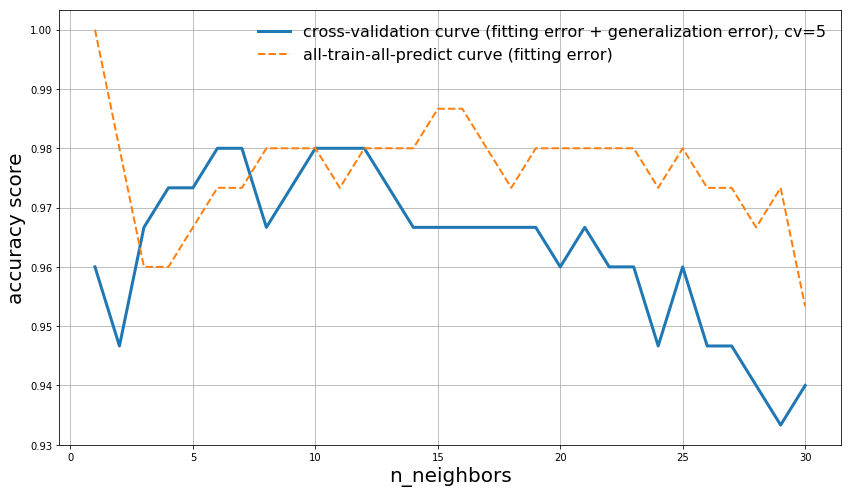

In [99]:
%pylab inline

n_neighbors_list = range(1,31)
scores = []
#scores_cv10 = []
all_fit_scores = []

for n_neighbors in n_neighbors_list:
    knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    #knn = linear_model.LinearRegression()
    scores.append(model_selection.cross_val_score(knn, X,y, cv=5).mean())
    #scores_cv10.append(model_selection.cross_val_score(knn, X,y, cv=10).mean())
    knn.fit(X, y)
    all_fit_scores.append(knn.score(X,y))

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax.plot(n_neighbors_list, scores, label = 'cross-validation curve (fitting error + generalization error), cv=5', lw=3)
#ax.plot(n_neighbors_list, scores_cv10, label = 'cross-validation curve (fitting error + generalization error), cv=10', lw=3)
ax.plot(n_neighbors_list, all_fit_scores, label = 'all-train-all-predict curve (fitting error)', ls='--', lw=2)
ax.grid()
ax.legend(fontsize=16, frameon=False)
ax.set_xlabel('n_neighbors', fontsize=20)
ax.set_ylabel('accuracy score', fontsize=20)

### validation curve in one function

In [100]:
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
train_scores, test_scores = model_selection.validation_curve(knn, iris.data, iris.target, 
                                                             'n_neighbors', range(1,31), cv=5)

Text(0, 0.5, 'accuracy score')

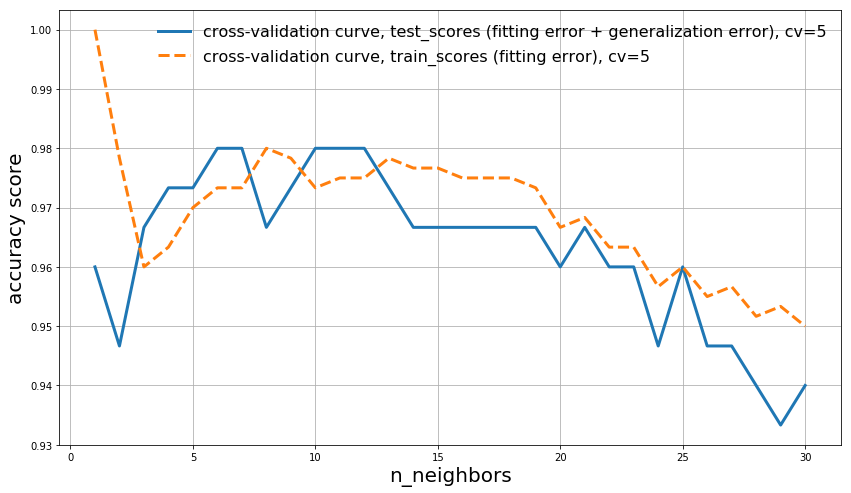

In [110]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax.plot(range(1,31), [mean(xx) for xx in test_scores], 
        label = 'cross-validation curve, test_scores (fitting error + generalization error), cv=5', lw=3)
ax.plot(range(1,31), [mean(xx) for xx in train_scores], 
        label = 'cross-validation curve, train_scores (fitting error), cv=5', lw=3, ls = '--')

ax.grid()
ax.legend(fontsize=16, frameon=False)
ax.set_xlabel('n_neighbors', fontsize=20)
ax.set_ylabel('accuracy score', fontsize=20)

### 输出自己的模型

In [138]:
X, y = digits.data, digits.target
knn = neighbors.KNeighborsClassifier(n_neighbors=5, )
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [146]:
knn.score(X,y)

0.9905397885364496

In [145]:
import sklearn.externals.joblib as jb

In [149]:
!mkdir knn_files
jb.dump(knn, './knn_files/nb5')

mkdir: cannot create directory ‘knn_files’: File exists


['./knn_files/nb5']

In [147]:
knn = jb.load('knn_files/nb5')
knn.score(X,y)

作业：

1. 弄懂所有内容

2. 使用 knn 拟合 digits, 绘制 n_neighbors = 1-31 的 train_score 以及 test_score 的 cross_validation curve. (你将看到 knn 的缓慢速度)

3. 选出你认为最好的 knn 模型，保存到文件。再使用 joblib 读入，对 digits data 进行预测。

4. 已知建造神经网络分类器的语句为
        from sklearn import neural_network
        nn = neural_network.MLPClassifier( )
    其中 nn 的第一个选项
        hidden_layer_sizes
    代表需要多少层神经网络，每层几个神经元。例如
        hidden_layer_sizes = (10, 15)
    表示有两层神经元，个数分别为 10, 15
    
    问题：
        请用单层 layer 的 nn 拟合 iris 数据库；使用 validation_curve 画出 performance 随 num_neuron 的变化。看多少个 neuron 可以满足问题需求（达到高准确度的预测结果）

In [123]:
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
digits = datasets.load_digits()
X, y = digits.data, digits.target
par_range = range(1,31)
train_scores, test_scores = model_selection.validation_curve(knn, X, y, 
                                                             'n_neighbors', par_range, cv=5)

Text(0, 0.5, 'accuracy score')

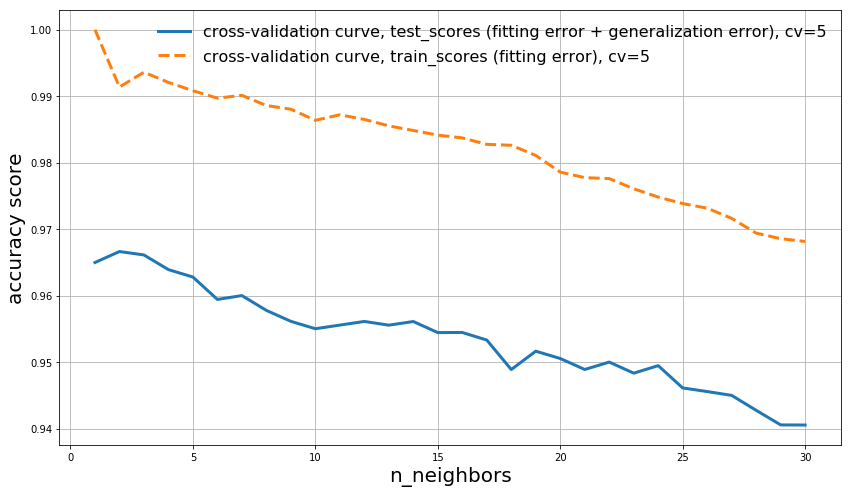

In [124]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax.plot(par_range, [mean(xx) for xx in test_scores], 
        label = 'cross-validation curve, test_scores (fitting error + generalization error), cv=5', lw=3)
ax.plot(par_range, [mean(xx) for xx in train_scores], 
        label = 'cross-validation curve, train_scores (fitting error), cv=5', lw=3, ls = '--')

ax.grid()
ax.legend(fontsize=16, frameon=False)
ax.set_xlabel('n_neighbors', fontsize=20)
ax.set_ylabel('accuracy score', fontsize=20)

In [136]:
%pylab inline
import seaborn as sb

Populating the interactive namespace from numpy and matplotlib


In [152]:
from sklearn import neural_network

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations 

Text(0, 0.5, 'accuracy score')

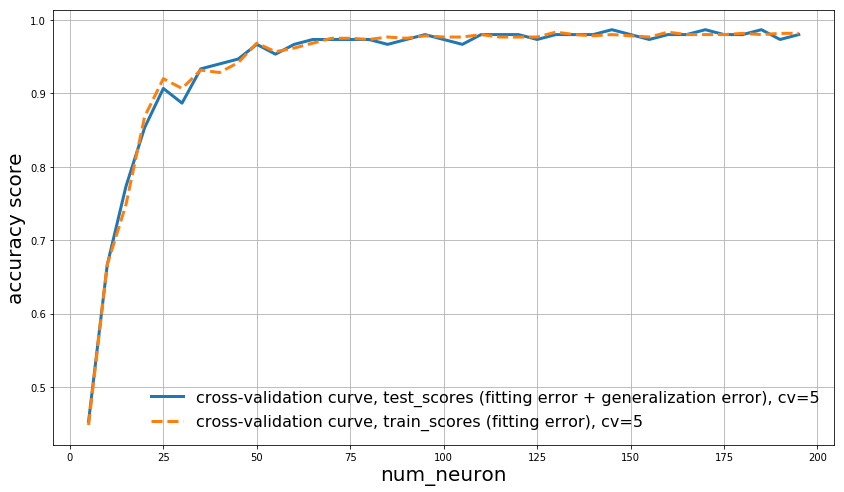

In [177]:
nn = neural_network.MLPClassifier( )

num_neurons = par_range = range(5,200,5)
hidden_layer_sizes = [ (num_neuron,) for num_neuron in num_neurons  ]

train_scores, test_scores = model_selection.validation_curve(nn, iris.data, iris.target, 
                                                             'hidden_layer_sizes', num_neurons, cv=5)

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax.plot(par_range, [mean(xx) for xx in test_scores], 
        label = 'cross-validation curve, test_scores (fitting error + generalization error), cv=5', lw=3)
ax.plot(par_range, [mean(xx) for xx in train_scores], 
        label = 'cross-validation curve, train_scores (fitting error), cv=5', lw=3, ls = '--')

ax.grid()
ax.legend(fontsize=16, frameon=False)
ax.set_xlabel('num_neuron', fontsize=20)
ax.set_ylabel('accuracy score', fontsize=20)

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/xiaodongli/software/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

{'fit_time': array([0.09291506, 0.0711236 , 0.07431817]),
 'score_time': array([0.00031114, 0.00037003, 0.0005033 ]),
 'test_score': array([0.33333333, 0.33333333, 0.66666667]),
 'train_score': array([0.33333333, 0.33333333, 0.66666667])}